In [1]:
####### os, pickle
import os
import pickle

import pandas as pd
import numpy as np

from collections import Counter
from imblearn.over_sampling import SMOTE 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

os.chdir('../')
from Funciones.funciones import * 
#from Carga_dataset import data,df,df0
#from main import *
os.chdir('./Modelos')

In [2]:
fh5=open('..\Datos\df_PCA10k_train_test.pkl','rb')
train_test=pickle.load(fh5)
fh5.close()


X = train_test['X']
y = train_test['y']

print('X:',X.shape,'y:',y.shape)

X: (54484, 10113) y: (54484, 1)


In [4]:
X.shape

(54484, 10113)

In [10]:
Counter(y['label'])

Counter({0: 48534, 1: 5950})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y

In [5]:
Counter(y_train_smote['label'])

Counter({0: 32518, 1: 9755})

In [6]:
y_train_smote['label'].values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
len(X_train_smote.values[0])

10113

In [8]:
randomforest = RandomForestClassifier()

In [9]:
randomforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params={'bootstrap': [True],
        'max_depth': [10],# Maxima pofundidad del arbol
        'max_features': [50,100], # numero de features a considerar en cada split
        'max_leaf_nodes': [10,20,30], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.02, 0.01], # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [10], # The minimum number of samples required to split an internal node:
        'n_estimators': [200] # number of trees
        }


In [10]:
params={'bootstrap': [True],
        'max_depth': [10],# Maxima pofundidad del arbol
        'max_features': [50,100], # numero de features a considerar en cada split
        'max_leaf_nodes': [10], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.01], # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [10], # The minimum number of samples required to split an internal node:
        'n_estimators': [200] # number of trees
        }

# scoring: lista de metricas a obtener
scoring = ['roc_auc']

n_cv=3

# creamos la GridSeacrh
grid_solver = GridSearchCV(estimator = randomforest, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = n_cv,
                   n_jobs=-1,
                   refit = 'roc_auc',
                   verbose = 1)

In [11]:
y_train_smote['label'].values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [12]:
model_result_randomforest = grid_solver.fit(X_train_smote.values, y_train_smote['label'].values)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [13]:
results_cv = model_result_randomforest.cv_results_
results = pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_split,param_n_estimators,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,90.486901,7.936191,0.364344,0.082699,True,10,50,10,0.01,10,200,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.861788,0.837247,0.875341,0.858125,0.015766,2
1,134.863255,5.648340,0.328661,0.045257,True,10,100,10,0.01,10,200,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.873674,0.890784,0.893722,0.886060,0.008840,1


C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


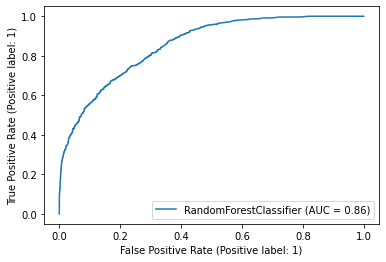

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Train AUC 0.8664284866050136
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     32518
           1       0.00      0.00      0.00      9755

    accuracy                           0.77     42273
   macro avg       0.38      0.50      0.43     42273
weighted avg       0.59      0.77      0.67     42273



C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

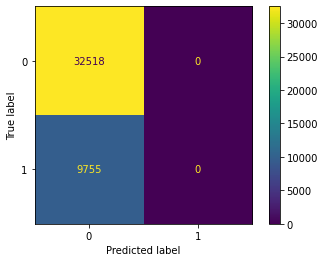

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test AUC 0.8551919853313692
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     16016
           1       0.00      0.00      0.00      1964

    accuracy                           0.89     17980
   macro avg       0.45      0.50      0.47     17980
weighted avg       0.79      0.89      0.84     17980



C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

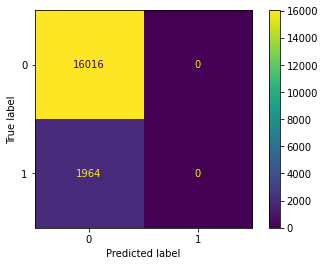

In [14]:
metrics(model_result_randomforest.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)